In [1]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [2]:
index = torch.tensor([[0, 1]])
value = 2
torch.zeros(3, 5).scatter_(0, index, value)

tensor([[2., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [3]:
torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(3), value=1)

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [4]:
# Image Classification
import torch
from torchvision.transforms import v2

H, W = 32, 32
img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
img = transforms(img)

In [5]:
# Detection (re-using imports and transforms from above)
from torchvision import tv_tensors

img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)
boxes = torch.randint(0, H // 2, size=(3, 4))
boxes[:, 2:] += boxes[:, :2]
boxes = tv_tensors.BoundingBoxes(boxes, format="XYXY", canvas_size=(H, W))

# The same transforms can be used!
img, boxes = transforms(img, boxes)
# And you can pass arbitrary input structures
output_dict = transforms({"image": img, "boxes": boxes})

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
from torchvision.utils import draw_bounding_boxes

plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

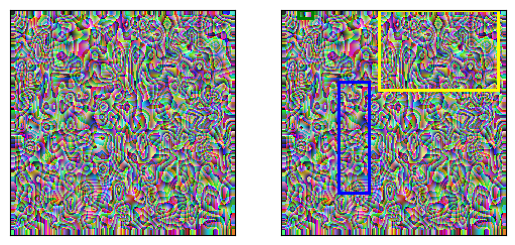

In [7]:
colors = ["blue", "yellow", "green"]
result = draw_bounding_boxes(img, boxes, colors=colors, width=3)
show([img, result])